# Fluxonium Design with 6 single qubits NEW EVEN SIMPLER look

## This notebook for after getting measurement values, trying pyEPR analysis

### Preparations

In [3]:
# For convenience, let's begin by enabling
# automatic reloading of modules when they change.
%load_ext autoreload
%autoreload 2

import numpy as np
from collections import OrderedDict

import warnings
warnings.filterwarnings('ignore')

import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict
import matplotlib.pyplot as plt

from qiskit_metal.toolbox_metal import math_and_overrides

from qiskit_metal.qlibrary.core import QComponent

from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.tlines.pathfinder import RoutePathfinder
from qiskit_metal.qlibrary.tlines.anchored_path import RouteAnchors

from qiskit_metal.qlibrary.qubits.fluxoniumEPR import FluxoniumPocket

from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond

from qiskit_metal.qlibrary.terminations.open_to_ground_v2 import OpenToGround
from qiskit_metal.renderers.renderer_ansys.ansys_renderer import QAnsysRenderer

from qiskit_metal.analyses.sweep_and_optimize.sweeping import Sweeping


import pyEPR as epr
from qiskit_metal.analyses.quantization import EPRanalysis

In [4]:
# Each time you create a new quantum circuit design,
# you start by instantiating a QDesign class.

# The design class `DesignPlanar` is best for 2D circuit designs.
design = designs.DesignPlanar()
design.chips.main.material = 'silicon'
design.variables['cpw_width'] = '15 um'
design.variables['cpw_gap'] = '8.733 um'
design._chips['main']['size']['size_x'] = '9mm'
design._chips['main']['size']['size_y'] = '9mm'

# If you disable the next line with "overwrite_enabled", then you will need to
# delete a component [<component>.delete()] before recreating it.
design.overwrite_enabled = True

eig_qres = EPRanalysis(design, "hfss")
hfss = design.renderers.hfss
hfss = eig_qres.sim.renderer
q3d = design.renderers.q3d

gui = MetalGUI(design)

In [5]:
from qiskit_metal.qlibrary.qubits.fluxoniumEPR import FluxoniumPocket

gds_cell_name_jj = 'junction_0'
gds_cell_name_inductor = 'jj_array0'

# Q1 details
options = dict(chip='main', nanowire = False, 
            orientation =90, pos_x = '-2.2mm', pos_y = '-2.3mm',
            gds_cell_name=gds_cell_name_jj,
            gds_cell_inductor=gds_cell_name_inductor ,
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = True,
            fbl_sep='85um', cpw_width ='10um',
                        cpw_gap = '11.233 um'), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = True,
                            ),
    readout_line_options=Dict(loc_H = -1, make_rol = True, 
              ) )
               
q1 = FluxoniumPocket(design,'Q1', options = dict(
             **options))

# Q6 details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '2.2mm', pos_y = '-3.2mm',
        gds_cell_name=gds_cell_name_jj,
        gds_cell_inductor=gds_cell_name_inductor ,
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = True,
        fbl_sep='85um', cpw_width ='10um',
                                cpw_gap = '11.233 um'), 
               
    charge_line_options=Dict(loc_H = -1, make_cl = True,
                            ), 
    readout_line_options=Dict(loc_H = +1, make_rol = True,
              ) )
               
q6 = FluxoniumPocket(design,'Q6', options = dict(
        **options))


# Q2 details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '-2.2mm', pos_y = '0.0mm',
        gds_cell_name=gds_cell_name_jj,
        gds_cell_inductor=gds_cell_name_inductor ,
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = True,
           fbl_sep='85um', cpw_width ='10um',
                                cpw_gap = '11.233 um'), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = True,
                            ),
    readout_line_options=Dict(loc_H = -1, make_rol = True,
              ) )
               
q2 = FluxoniumPocket(design,'Q2', options = dict(
        **options))

# Q5 details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '2.4mm', pos_y = '-0.8mm',
        gds_cell_name=gds_cell_name_jj,
               gds_cell_inductor=gds_cell_name_inductor ,
               inductor_orientation='-1',
                      
    flux_bias_line_options=Dict(make_fbl = True,
         fbl_sep='85um', cpw_width ='10um',
                                cpw_gap = '11.233 um'), 
               
    charge_line_options=Dict(loc_H = -1, make_cl = True,
                            ), 
    readout_line_options=Dict(loc_H = +1, make_rol = True,
              ) )
               
q5 = FluxoniumPocket(design,'Q5', options = dict(
        **options))


# Q3 details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '-2.5mm', pos_y = '3.0mm',
        gds_cell_name=gds_cell_name_jj,
        gds_cell_inductor=gds_cell_name_inductor ,
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = True,
        fbl_sep='85um', cpw_width ='10um',
                                cpw_gap = '11.233 um'), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = True,
                            ),
    readout_line_options=Dict(loc_H = -1, make_rol = True,
              ) )
               
q3 = FluxoniumPocket(design,'Q3', options = dict(
        **options))

# Q4 details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '2.4mm', pos_y = '2.0mm',
        gds_cell_name=gds_cell_name_jj,
        gds_cell_inductor=gds_cell_name_inductor,
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = True,
        fbl_sep='85um', cpw_width ='10um',
                                cpw_gap = '11.233 um'), 
               
    charge_line_options=Dict(loc_H = -1, make_cl = True,
                            ),
    readout_line_options=Dict(loc_H = 1, make_rol = True,
              ) )
               
q4 = FluxoniumPocket(design,'Q4', options = dict(
        **options))

# Q JJ1 Trial details
options = dict(chip='main',  nanowire = False,
        orientation =90, pos_x = '-1.0mm', pos_y = '1.0mm',
               pocket_width= '600um',
        gds_cell_name=gds_cell_name_jj,
               
    flux_bias_line_options=Dict(make_fbl = False), 
               
    charge_line_options=Dict(loc_H = -1, make_cl = False,
                            ),
    readout_line_options=Dict(loc_H = 1, make_rol = False,
              ) )
               
qJJ1 = FluxoniumPocket(design,'QJJ1', options = dict(
        **options))

# Q JJ2 Trial details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '-1.0mm', pos_y = '1.2mm',
               pocket_width= '600um',
        gds_cell_name=gds_cell_name_jj,   
               
    flux_bias_line_options=Dict(make_fbl = False), 
               
    charge_line_options=Dict(loc_H = -1, make_cl = False,
                            ),
    readout_line_options=Dict(loc_H = 1, make_rol = False,
              ) )
               
qJJ2 = FluxoniumPocket(design,'QJJ2', options = dict(
        **options))

# Q JJ3 Trial details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '-1.0mm', pos_y = '1.4mm',
               pocket_width= '600um',
        gds_cell_name=gds_cell_name_jj,  
               
    flux_bias_line_options=Dict(make_fbl = False), 
               
    charge_line_options=Dict(loc_H = -1, make_cl = False,
                            ),
    readout_line_options=Dict(loc_H = 1, make_rol = False,
              ) )
               
qJJ3 = FluxoniumPocket(design,'QJJ3', options = dict(
        **options))


# Q Array1 details
options = dict(chip='main', nanowire = False, 
            orientation =90, pos_x = '1.0mm', pos_y = '0.6mm',
            gds_cell_inductor=gds_cell_name_inductor , pocket_width= '600um',
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = False,
                        ), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = False,
               ),
    readout_line_options=Dict(loc_H = -1, make_rol = False, 
              ) )
               
qArr1 = FluxoniumPocket(design,'QArr1', options = dict(
             **options))


# Q Array2 Trial details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '1.0mm', pos_y = '0.8mm',
               pocket_width= '600um',
        gds_cell_inductor=gds_cell_name_inductor ,   
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = False,
                               ), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = False,
                            ),
    readout_line_options=Dict(loc_H = -1, make_rol = False, 
              ) )
               
qArr2 = FluxoniumPocket(design,'QArr2', options = dict(
        **options))

# Q Array3 Trial details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '1.0mm', pos_y = '1.0mm',
               pocket_width= '600um',
        gds_cell_inductor=gds_cell_name_inductor , 
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = False,
                      ), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = False,
                            ),
    readout_line_options=Dict(loc_H = -1, make_rol = False, 
              ) )
               
qArr3 = FluxoniumPocket(design,'QArr3', options = dict(
        **options))


gui.rebuild()

In [6]:
# Lambda/2 resonator for Q1
otg1 = OpenToGround(design, 'otg1s', options=dict(chip='main', 
                 pos_x='-37.733um', pos_y='-2.8mm', orientation='270'))
rt_meander = RouteMeander(design, 'cavity1',  Dict(meander=Dict(spacing='200um'),
        total_length='8.853mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg1s', pin='open'),
            end_pin=Dict(component='Q1', pin='readout_line')), ))


gui.rebuild()

In [7]:
# Lambda/2 resonator for Q6
otg6 = OpenToGround(design, 'otg6s', options=dict(chip='main', pos_x='37.733um',  pos_y='-2.8mm', orientation='270'))
rt_meander = RouteMeander(design, 'cavity6',  Dict(meander=Dict(spacing='200um'),
        total_length='9.0mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg6s', pin='open'),
            end_pin=Dict(component='Q6', pin='readout_line')), ))


gui.rebuild()

In [8]:
# Lambda/2 resonator for Q2
otg2 = OpenToGround(design, 'otg2s', options=dict(chip='main', pos_x='-37.733um',  pos_y='-0.2mm', orientation='90'))
rt_meander = RouteMeander(design, 'cavity2',  Dict(meander=Dict(spacing='200um'),
        total_length='9.6mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg2s', pin='open'),
            end_pin=Dict(component='Q2', pin='readout_line')), ))


gui.rebuild()

In [9]:
# Lambda/2 resonator for Q5
otg5 = OpenToGround(design, 'otg5s', options=dict(chip='main', pos_x='37.733um',  pos_y='-0.9mm', orientation='270'))
rt_meander = RouteMeander(design, 'cavity5',  Dict(meander=Dict(spacing='200um'),
        total_length='10.2mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg5s', pin='open'),
            end_pin=Dict(component='Q5', pin='readout_line')), ))


gui.rebuild()

In [10]:
# Lambda/2 resonator for Q3
otg3 = OpenToGround(design, 'otg3s', options=dict(chip='main', pos_x='-37.733um',  pos_y='2.6mm', orientation='270'))
rt_meander = RouteMeander(design, 'cavity3',  Dict(meander=Dict(spacing='200um'),
        total_length='11.0mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg3s', pin='open'),
            end_pin=Dict(component='Q3', pin='readout_line')), ))


gui.rebuild()

In [11]:
# Lambda/2 resonator for Q4
otg4 = OpenToGround(design, 'otg4s', options=dict(chip='main', pos_x='37.733um',  pos_y='2.0mm', orientation='270'))
rt_meander = RouteMeander(design, 'cavity4',  Dict(meander=Dict(spacing='200um'),
        total_length='11.9mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg4s', pin='open'),
            end_pin=Dict(component='Q4', pin='readout_line')), ))


gui.rebuild()
gui.autoscale()

In [17]:
# Charge Line and Flux Bias Line for Q1
XYCharge_LineQ1 = RoutePathfinder(design, 'XY_Gate1', 
        options = dict(chip='main', fillet='99um',
            lead=dict(start_straight='150um', end_straight='600um', 
                     ),
            pin_inputs=Dict(start_pin=Dict(component='Q1', pin='charge_line'),
                            end_pin=Dict(component='LPCL1', pin='tie')
                                            )))

gui.rebuild()

In [18]:
# Charge Line and Flux Bias Line for Q1
ZFluxBias_LineQ1 = RoutePathfinder(design, 'Z_Gate1', 
        options = dict(chip='main', fillet='99um',
            lead=dict(start_straight='200um', 
        end_straight='400um'),
        pin_inputs=Dict(start_pin=Dict(component='Q1', 
              pin='flux_bias_line'),
          end_pin=Dict(component='LPFB1', pin='tie')
                                   )))

gui.rebuild()

In [19]:
# Charge Lıne and Flux Bias Line for Q2
XYCharge_LineQ2 = RoutePathfinder(design, 'XY_Gate2', options = dict(chip='main',
                        fillet='80um',
                lead=dict(start_straight='150um', end_straight='850um'),
                pin_inputs=Dict(start_pin=Dict(component='Q2', pin='charge_line'),
                                    end_pin=Dict(component='LPCL2',pin='tie')
                                            )))

gui.rebuild()

In [20]:
# Charge Lıne and Flux Bias Line for Q2
ZFluxBias_LineQ2 = RoutePathfinder(design, 'Z_Gate2', options = dict(chip='main',
             fillet='99um',
          lead=dict(start_straight='250um', end_straight='250um'),
        pin_inputs=Dict(start_pin=Dict(component='Q2', pin='flux_bias_line'),
                            end_pin=Dict(component='LPFB2',pin='tie')
                                            )))

gui.rebuild()

In [21]:
# Charge Lıne and Flux Bias Line for Q3
XYCharge_LineQ3 = RoutePathfinder(design, 'XY_Gate3', options = dict(chip='main',
                         fillet='99um',
       lead=dict(start_straight='250um', end_straight='450um'), 
            pin_inputs=Dict(start_pin=Dict(component='Q3', pin='charge_line'),
                    end_pin=Dict(component='LPCL3', pin='tie')
                                            )))
gui.rebuild()

In [22]:
# Charge Lıne and Flux Bias Line for Q3
ZFluxBias_LineQ3 = RoutePathfinder(design, 'Z_Gate3', options = dict(chip='main',
                fillet='99um',
           lead=dict(start_straight='100um', end_straight='200um'),
            pin_inputs=Dict(start_pin=Dict(component='Q3', pin='flux_bias_line'),
                end_pin=Dict(component='LPFB3', pin='tie')
                                            )))

gui.rebuild()

In [23]:
# Charge Lıne and Flux Bias Line for Q6
XYCharge_LineQ6 = RoutePathfinder(design, 'XY_Gate6', 
        options = dict(chip='main', fillet='99um',
        lead=dict(start_straight='100um', end_straight='650um'),
    pin_inputs=Dict(start_pin=Dict(component='Q6', pin='charge_line'),
    end_pin=Dict(component='LPCL6', pin='tie')
                                            )))

gui.rebuild()

In [24]:
# Charge Lıne and Flux Bias Line for Q6
ZFluxBias_LineQ6 = RoutePathfinder(design, 'Z_Gate6', 
        options = dict(chip='main', fillet='99um',
            lead=dict(start_straight='350um', end_straight='650um'),
        pin_inputs=Dict(start_pin=Dict(component='Q6', 
              pin='flux_bias_line'),
          end_pin=Dict(component='LPFB6', pin='tie')
                                   )))

gui.rebuild()

In [25]:
# Charge Lıne and Flux Bias Line for Q5
XYCharge_LineQ5 = RoutePathfinder(design, 'XY_Gate5', options = dict(chip='main',
                          fillet='99um',
            lead=dict(start_straight='250um', end_straight='650um'),
                    pin_inputs=Dict(start_pin=Dict(component='Q5',pin='charge_line'),
                    end_pin=Dict(component='LPCL5', pin='tie')
                                            )))

gui.rebuild()

In [26]:
# Charge Line and Flux Bias Line for Q5
ZFluxBias_LineQ5 = RoutePathfinder(design, 'Z_Gate5', options = dict(chip='main',
                        fillet='99um',
            lead=dict(start_straight='200um', end_straight='450um'),
                pin_inputs=Dict(start_pin=Dict(component='Q5', pin='flux_bias_line'),
                            end_pin=Dict(component='LPFB5', pin='tie')
                                            )))
gui.rebuild()

In [27]:
# Charge Line and Flux Bias Line for Q4
XYCharge_LineQ4 = RoutePathfinder(design, 'XY_Gate4', options = dict(chip='main',
                    fillet='99um',
                    lead=dict(start_straight='200um', end_straight='550um'),pin_inputs=Dict(
                        start_pin=Dict(component='Q4', pin='charge_line'),
                            end_pin=Dict(component='LPCL4', pin='tie')
                                            )))
gui.rebuild()

In [28]:
# Charge Lıne and Flux Bias Line for Q4
ZFluxBias_LineQ4 = RoutePathfinder(design, 'Z_Gate4', options = dict(chip='main',
                            fillet='99um',
                    lead=dict(start_straight='150um', end_straight='200um'), pin_inputs=Dict(
                            start_pin=Dict(component='Q4',
                                pin='flux_bias_line'),
                                end_pin=Dict(component='LPFB4',
                                        pin='tie')
                                            )))
gui.rebuild()

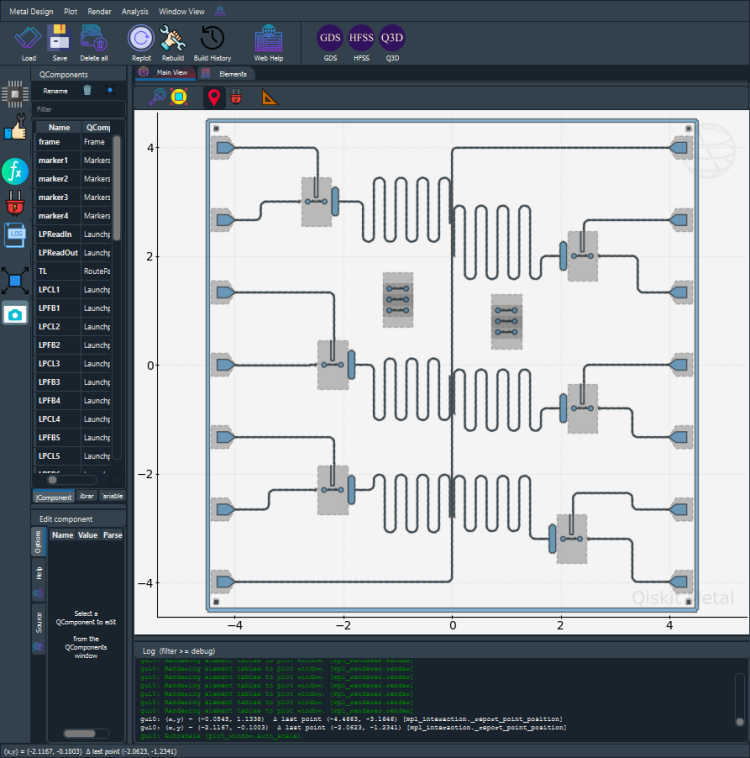

In [29]:
#Save screenshot as a .png formatted file.
gui.screenshot()

In [ ]:
q1 #print Q1 information


## pyEPR for Fluxonium Qubits


### These values can differ from measurement to measurement. The values you see in this notebook are from measurement data. 

In [12]:
eig_qb = EPRanalysis(design,"hfss")

In [13]:
eig_qb.sim.setup_update(n_modes = 2,
                        max_delta_f = 0.1,
                        min_freq_ghz = 1,
                        max_passes = 12)
eig_qb.sim.setup.vars.Lj = '57.77nH' #E_j is 2.8270GHz
eig_qb.sim.setup.vars.Cj = '0.0nH'
#eig_qb.sim.setup.vars.Ls = q1.options.l_inductance
eig_qb.sim.setup.vars.Ls = '181.47nH' #E_L is 0.900GHz

eig_qb.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'min_freq_ghz': 1,
 'n_modes': 2,
 'max_delta_f': 0.1,
 'max_passes': 12,
 'min_passes': 1,
 'min_converged': 1,
 'pct_refinement': 30,
 'basis_order': 1,
 'vars': {'Lj': '57.77nH', 'Cj': '0.0nH', 'Ls': '181.47nH'}}

In [14]:
qubit_nr = '1'
eig_qb.sim.run(name="FluxoniumEPR", components=['Q'+qubit_nr, 'cavity'+qubit_nr, 'otg1s'], open_terminations=[], box_plus_buffer = True)

INFO 10:58AM [connect_project]: Connecting to Ansys Desktop API...
INFO 10:58AM [load_ansys_project]: 	Opened Ansys App
INFO 10:58AM [load_ansys_project]: 	Opened Ansys Desktop v2020.2.0
INFO 10:58AM [load_ansys_project]: 	Opened Ansys Project
	Folder:    //tudelft.net/staff-homes/Y/figenyilmaz/My Documents/Ansoft/
	Project:   Project16
INFO 10:58AM [connect_design]: 	Opened active design
	Design:    FluxoniumEPR_hfss [Solution type: Eigenmode]
INFO 10:58AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 10:58AM [connect]: 	Connected to project "Project16" and design "FluxoniumEPR_hfss" 😀 

INFO 10:58AM [connect_design]: 	Opened active design
	Design:    FluxoniumEPR_hfss [Solution type: Eigenmode]
INFO 10:58AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 10:58AM [analyze]: Analyzing setup Setup
11:05AM 15s INFO [get_f_convergence]: Saved convergences to C:\Users\figenyilmaz\GitLab\figen-qiskit-metal\Fluxonium Designs\hfss_ei

In [15]:
eig_qb.sim.convergence_f

,re(Mode(1)) [g],re(Mode(2)) [g]
Pass [],,
1,3.230936,4.320285
2,4.555515,4.739695
3,4.974444,5.421464
4,5.403986,5.826253
5,5.666229,6.075940
6,5.837724,6.188971
7,5.897666,6.257974
8,5.945367,6.302280
9,5.975011,6.335127


In [16]:
# Add the geometry of the rectangle  and line of the inductor to the list of junctions
eig_qb.setup.junctions.jj.rect = 'JJ_rect_Lj_Q1_rect_jj'
eig_qb.setup.junctions.jj.line = 'JJ_Lj_Q1_rect_jj_'

eig_qb.add_junction(name_junction ='inductor')
eig_qb.setup.junctions.inductor.Lj_variable = 'Ls'
eig_qb.setup.junctions.inductor.rect = 'JJ_rect_Lj_Q1_inductor'
eig_qb.setup.junctions.inductor.line = 'JJ_Lj_Q1_inductor_'
# eig_qb.setup.junctions.inductor.is_junction = False

# Set up th EPR analysis parameters
eig_qb.setup.fock_trunc = 20
eig_qb.setup.cos_trunc = 6
eig_qb.setup.flux = 0.0

eig_qb.setup.basis = 'HO'

# eig_qb.setup.sweep_variable = 'flux'   #--- This would be nice to implement to get a sweep over flux bias 
eig_qb.setup

{'junctions': {'jj': {'Lj_variable': 'Lj',
   'Cj_variable': 'Cj',
   'rect': 'JJ_rect_Lj_Q1_rect_jj',
   'line': 'JJ_Lj_Q1_rect_jj_'},
  'inductor': {'Lj_variable': 'Ls',
   'Cj_variable': 'Cj',
   'rect': 'JJ_rect_Lj_Q1_inductor',
   'line': 'JJ_Lj_Q1_inductor_'}},
 'dissipatives': {'dielectrics_bulk': ['main']},
 'cos_trunc': 6,
 'fock_trunc': 20,
 'flux': 0.0,
 'basis': 'HO',
 'sweep_variable': 'Lj'}

In [ ]:
# eig_qb.run_epr()
#### equivalent individual calls
s = eig_qb.setup
eig_qb.epr_start()
eig_qb.get_stored_energy()
eig_qb.run_analysis()

Design "FluxoniumEPR_hfss" info:
	# eigenmodes    2
	# variations    1
Design "FluxoniumEPR_hfss" info:
	# eigenmodes    2
	# variations    1
Design "FluxoniumEPR_hfss" info:
	# eigenmodes    2
	# variations    1

        energy_elec_all       = 2.54014557968307e-25
        energy_elec_substrate = 2.33733888063603e-25
        EPR of substrate = 92.0%

        energy_mag    = 5.36800887192327e-27
        energy_mag % of energy_elec_all  = 2.1%
        

Variation 0  [1/1]

  Mode 0 at 6.00 GHz   [1/2]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
                1.6%  4.254e-24 4.187e-24

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 85.89%
	jj              0.00800316  (+)        0.00131468
		Energy fraction (Lj over Lj&Cj)= 65.96%
	inductor        0.00255207  (+)        0.0013169
		(U_tot_cap-U_tot_ind)/mean=0.

In [206]:
s

{'junctions': {'jj': {'Lj_variable': 'Lj',
   'Cj_variable': 'Cj',
   'rect': 'JJ_rect_Lj_Q1_rect_jj',
   'line': 'JJ_Lj_Q1_rect_jj_'},
  'inductor': {'Lj_variable': 'Ls',
   'Cj_variable': 'Cj',
   'rect': 'JJ_rect_Lj_Q1_inductor',
   'line': 'JJ_Lj_Q1_inductor_'}},
 'dissipatives': {'dielectrics_bulk': ['main']},
 'cos_trunc': 6,
 'fock_trunc': 20,
 'flux': 0.0,
 'basis': 'HO',
 'sweep_variable': 'Lj'}

WARNING 01:38PM [__init__]: <p>Error: <class 'IndexError'></p>


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0



ERROR 01:38PM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 54.6% is > 15%.                     
Is the simulation converged? Proceed with caution


[5.7770e-08 1.8147e-07]
[0]
Using Full Cosine Potential
ϕzpf mode 0 :  -0.09535307519853851
ϕzpf mode 1 :  0.9135712334231423
Starting the diagonalization
Finished the diagonalization
(2, 1)
Single junctions -- assuming single qubit mode
[[-0.09535308]
 [ 0.91357123]]
qubit mode 1
N_HO: [0]


ERROR 01:38PM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 54.6% is > 15%.                     
Is the simulation converged? Proceed with caution


Pm_norm=
modes
0    1.377707
1    1.766863
dtype: float64

Pm_norm idx =
      jj  inductor
0  False     False
1   True     False
*** P (participation matrix, not normlz.)
         jj  inductor
0  0.008572  0.002731
1  0.418979  0.133461

*** S (sign-bit matrix)
   s_jj  s_inductor
0    -1          -1
1     1           1
*** P (participation matrix, normalized.)
    0.0086
      0.74

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
     0.117     21.5
      21.5      985

*** Chi matrix ND (MHz) 
  -0.00471    -2.51
     -2.51-1.34e+03

*** Frequencies O1 PT (MHz)
0    5991.734098
1    5383.955858
dtype: float64

*** Frequencies ND (MHz)
0    6008.629903
1    5237.817616
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0, 1]


#### Mode frequencies (MHz)

###### Numerical diagonalization

Lj,57.77
0,6008.63
1,5237.82


#### Kerr Non-linear coefficient table (MHz)

###### Numerical diagonalization

0        1
Lj                        
57.77 0 -4.71e-03    -2.51
      1 -2.51e+00 -1336.61

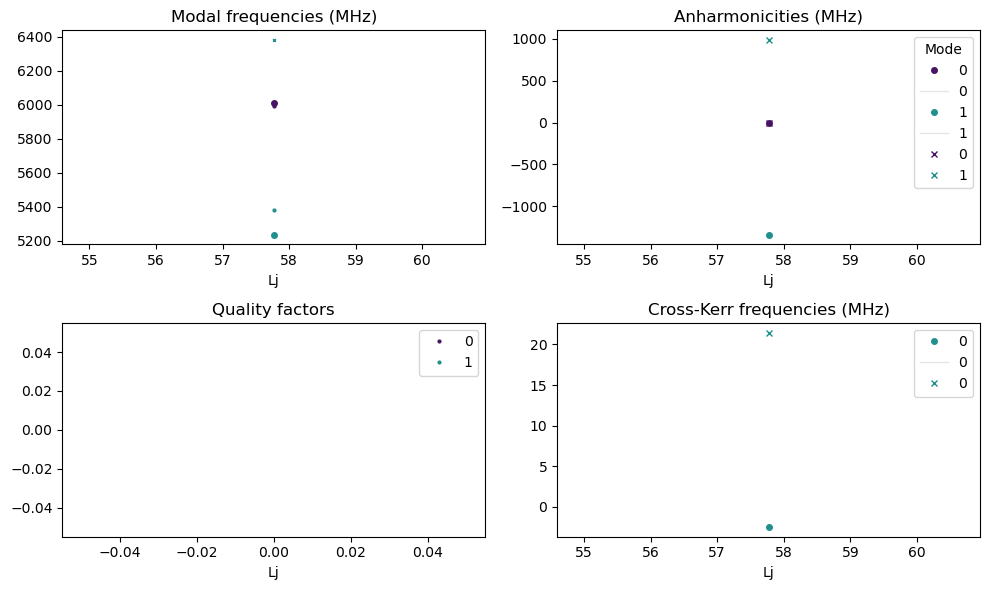

In [258]:
eig_qb.spectrum_analysis(s.cos_trunc, s.fock_trunc, basis=s.basis, flux=s.flux, junctions=[0])
eig_qb.report_hamiltonian(s.sweep_variable)

In [259]:
from IPython.display import clear_output
chis = []
freq_q = []
freq_r = []
phis = np.linspace(-1,2.0,201)
for phi in phis:
    eig_qb.setup.flux = phi
    s = eig_qb.setup
    eig_qb.spectrum_analysis(s.cos_trunc, s.fock_trunc, basis=s.basis, flux=s.flux, junctions=[0])
    a = eig_qb.sim.renderer.epr_quantum_analysis.get_frequencies()
    freq_q.append(a['0'][1])
    freq_r.append(a['0'][0])
    b = eig_qb.sim.renderer.epr_quantum_analysis.get_chis()
    chi = -b[0][1]
    chis.append(chi)
    clear_output()

In [ ]:
%matplotlib inline

In [271]:
with open('simulated_data-res.npy', 'wb') as f:
    np.save(f, phis)
    np.save(f, np.array(freq_r)/1000)
    np.save(f, np.array(freq_q)/1000)

(5.993, 6.0201)

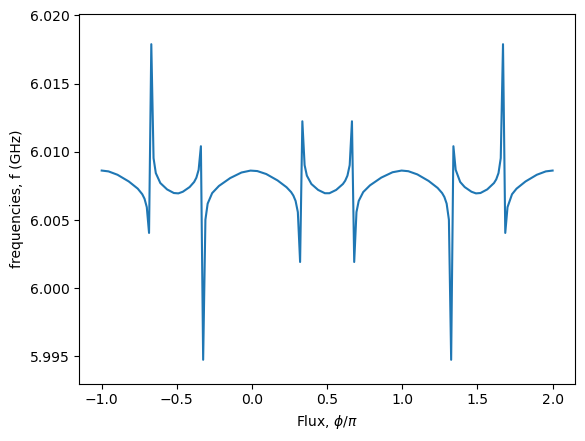

In [270]:
plt.plot(phis,np.array(freq_r)/1000)
plt.plot(phis,np.array(freq_q)/1000)
plt.xlabel(r'Flux, $\phi/\pi$')
plt.ylabel('frequencies, f (GHz)')
plt.ylim(5.993,6.0201)

(-1.0, 2.0)

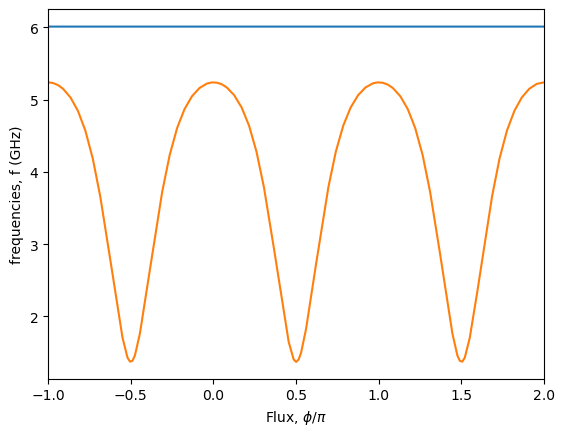

In [267]:
plt.plot(phis,np.array(freq_r)/1000)
plt.plot(phis,np.array(freq_q)/1000)
plt.xlabel(r'Flux, $\phi/\pi$')
plt.ylabel('frequencies, f (GHz)')
plt.xlim(-1,2)

Text(0, 0.5, 'Dispersive Shift, $\\chi/2\\pi$ (MHz)')

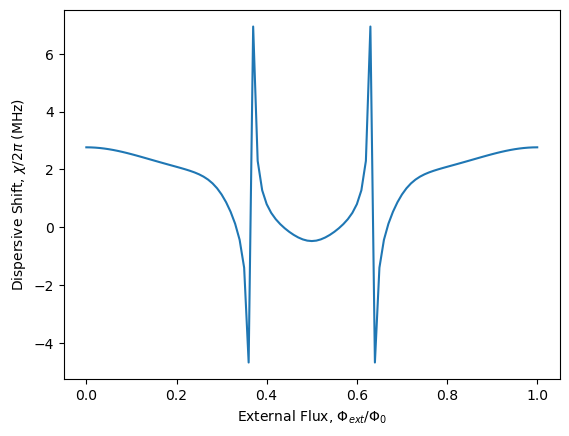

In [140]:
plt.plot(phis,chis)
#plt.xlabel(r'Flux, $\phi/\pi$')
plt.xlabel(r'External Flux, $\Phi_{ext}/\Phi_0$')
plt.ylabel(r'Dispersive Shift, $\chi/2\pi$ (MHz)')
#plt.ylabel(r'Dispersive shift, $\chi$ (MHz)')
#plt.ylim(-20,10)

# Qubit 1

In [72]:
eig_qb.sim.setup_update(n_modes = 2,
                        max_delta_f = 0.1,
                        min_freq_ghz = 1,
                        max_passes = 12)
eig_qb.sim.setup.vars.Lj = '34.3nH' # targetted E_j=4.75GHz
eig_qb.sim.setup.vars.Cj = '0.0nH'
eig_qb.sim.setup.vars.Ls = q1.options.l_inductance

eig_qb.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'min_freq_ghz': 1,
 'n_modes': 2,
 'max_delta_f': 0.1,
 'max_passes': 12,
 'min_passes': 1,
 'min_converged': 1,
 'pct_refinement': 30,
 'basis_order': 1,
 'vars': {'Lj': '34.3nH', 'Cj': '0.0nH', 'Ls': '200nH'},
 'run': {'name': 'FluxoniumEPR',
  'components': ['Q5', 'cavity5', 'otg5s'],
  'open_terminations': [],
  'port_list': None,
  'jj_to_port': None,
  'ignored_jjs': None,
  'box_plus_buffer': True}}

In [52]:
eig_qb.sim.run(name="FluxoniumEPR", components=['Q1', 'cavity1', 'otg1s'], open_terminations=[], box_plus_buffer = True)

INFO 04:21PM [connect_design]: 	Opened active design
	Design:    FluxoniumEPR_hfss [Solution type: Eigenmode]
INFO 04:21PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 04:21PM [analyze]: Analyzing setup Setup
04:30PM 22s INFO [get_f_convergence]: Saved convergences to C:\Users\figenyilmaz\GitLab\qiskit-metal\Fluxonium Designs\hfss_eig_f_convergence.csv


In [73]:
eig_qb.sim.convergence_f

,re(Mode(1)) [g],re(Mode(2)) [g]
Pass [],,
1,3.423211,3.901086
2,4.182607,4.647629
3,4.690390,5.488740
4,5.021155,5.854751
5,5.084940,6.056725
6,5.183961,6.190845
7,5.241568,6.246473
8,5.263635,6.299272
9,5.275885,6.335470


In [74]:
# Add the geometry of the rectangle  and line of the inductor to the list of junctions
eig_qb.setup.junctions.jj.rect = 'JJ_rect_Lj_Q1_rect_jj'
eig_qb.setup.junctions.jj.line = 'JJ_Lj_Q1_rect_jj_'

eig_qb.add_junction(name_junction ='inductor')
eig_qb.setup.junctions.inductor.Lj_variable = 'Ls'
eig_qb.setup.junctions.inductor.rect = 'JJ_rect_Lj_Q1_inductor'
eig_qb.setup.junctions.inductor.line = 'JJ_Lj_Q1_inductor_'
# eig_qb.setup.junctions.inductor.is_junction = False

# Set up th EPR analysis parameters
eig_qb.setup.fock_trunc = 15
eig_qb.setup.cos_trunc = 6
eig_qb.setup.flux = 0.0

eig_qb.setup.basis = 'HO'

# eig_qb.setup.sweep_variable = 'flux'   #--- This would be nice to implement to get a sweep over flux bias 
eig_qb.setup

06:44PM 16s WARNING [add_junction]: junction already defined. Overwriting inductor


{'junctions': {'jj': {'Lj_variable': 'Lj',
   'Cj_variable': 'Cj',
   'rect': 'JJ_rect_Lj_Q1_rect_jj',
   'line': 'JJ_Lj_Q1_rect_jj_'},
  'inductor': {'Lj_variable': 'Ls',
   'Cj_variable': 'Cj',
   'rect': 'JJ_rect_Lj_Q1_inductor',
   'line': 'JJ_Lj_Q1_inductor_'}},
 'dissipatives': {'dielectrics_bulk': ['main']},
 'cos_trunc': 6,
 'fock_trunc': 15,
 'flux': 0.0,
 'basis': 'HO',
 'sweep_variable': 'Lj'}

In [75]:
# eig_qb.run_epr()
#### equivalent individual calls
s = eig_qb.setup
eig_qb.epr_start()
eig_qb.get_stored_energy()
eig_qb.run_analysis()

AssertionError: pyEPR ProjectInfo user error found 😷:
                    Seems like for junction `jj` you specified a rect that does not exist
                    in HFSS by the name: `JJ_rect_Lj_Q1_rect_jj` 

In [59]:
eig_qb.spectrum_analysis(s.cos_trunc, s.fock_trunc, basis=s.basis, flux=s.flux, junctions=[0])
eig_qb.report_hamiltonian(s.sweep_variable)

WARNING 04:45PM [__init__]: <p>Error: <class 'IndexError'></p>
ERROR 04:45PM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 66.2% is > 15%.                     
Is the simulation converged? Proceed with caution


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

[8.43e-08 2.00e-07]
[0]
Using Full Cosine Potential
ϕzpf mode 0 :  0.30272768326740995
ϕzpf mode 1 :  0.9649705491055717
Starting the diagonalization
Finished the diagonalization
(2, 1)
Single junctions -- assuming single qubit mode


IndexError: list index out of range

In [ ]:
from IPython.display import clear_output
chis = []
freq_q = []
freq_r = []
phis = np.linspace(0,1,301)
for phi in phis:
    eig_qb.setup.flux = phi
    s = eig_qb.setup
    eig_qb.spectrum_analysis(s.cos_trunc, s.fock_trunc, basis=s.basis, flux=s.flux, junctions=[0])
    a = eig_qb.sim.renderer.epr_quantum_analysis.get_frequencies()
    freq_q.append(a['0'][1])
    freq_r.append(a['0'][0])
    b = eig_qb.sim.renderer.epr_quantum_analysis.get_chis()
    chi = -b[0][1]
    chis.append(chi)
    clear_output()

In [ ]:
plt.plot(phis,np.array(freq_r)/1000)
plt.plot(phis,np.array(freq_q)/1000)
plt.xlabel(r'Flux, $\phi/\pi$')
plt.ylabel('frequencies, f (GHz)')
plt.ylim(0,10)

In [ ]:
plt.plot(phis,chis)
#plt.xlabel(r'Flux, $\phi/\pi$')
plt.xlabel(r'External Flux, $\Phi_{ext}/\Phi_0$')
plt.ylabel(r'Dispersive Shift, $\chi/2\pi$ (MHz)')
#plt.ylabel(r'Dispersive shift, $\chi$ (MHz)')

## GDS

In [38]:
fluxonium_gds = design.renderers.gds
fluxonium_gds.options

{'short_segments_to_not_fillet': 'True',
 'check_short_segments_by_scaling_fillet': '2.0',
 'gds_unit': 0.001,
 'ground_plane': 'True',
 'negative_mask': {'main': []},
 'fabricate': 'False',
 'corners': 'circular bend',
 'tolerance': '0.00001',
 'precision': '0.000000001',
 'width_LineString': '10um',
 'path_filename': '../resources/Fake_Junctions.GDS',
 'junction_pad_overlap': '5um',
 'max_points': '199',
 'cheese': {'datatype': '100',
  'shape': '0',
  'cheese_0_x': '25um',
  'cheese_0_y': '25um',
  'cheese_1_radius': '100um',
  'view_in_file': {'main': {1: True}},
  'delta_x': '100um',
  'delta_y': '100um',
  'edge_nocheese': '200um'},
 'no_cheese': {'datatype': '99',
  'buffer': '25um',
  'cap_style': '2',
  'join_style': '2',
  'view_in_file': {'main': {1: True}}},
 'bounding_box_scale_x': '1.2',
 'bounding_box_scale_y': '1.2'}

In [39]:
fluxonium_gds.options['path_filename'] = 'FX22_JJ120andArray410_Circles_V3.2_9by9mm.gds'

In [40]:
fluxonium_gds.options['fabricate'] = True

In [34]:
fluxonium_gds.export_to_gds('FX22-W2-05-V3.2.gds')

08:18PM 49s WARNING [_give_rotation_center_twopads]: In junction table, component=Q1 with name=inductor has width=0.001 smaller than cell dimension=0.017.
08:18PM 49s WARNING [_give_rotation_center_twopads]: In junction table, component=Q6 with name=inductor has width=0.001 smaller than cell dimension=0.017.
08:18PM 49s WARNING [_give_rotation_center_twopads]: In junction table, component=Q2 with name=inductor has width=0.001 smaller than cell dimension=0.017.
08:18PM 49s WARNING [_give_rotation_center_twopads]: In junction table, component=Q5 with name=inductor has width=0.001 smaller than cell dimension=0.017.
08:18PM 49s WARNING [_give_rotation_center_twopads]: In junction table, component=Q3 with name=inductor has width=0.001 smaller than cell dimension=0.017.
08:18PM 49s WARNING [_give_rotation_center_twopads]: In junction table, component=Q4 with name=inductor has width=0.001 smaller than cell dimension=0.017.
08:18PM 49s WARNING [_import_junctions_to_one_cell]: From the "junctio

1

In [30]:
# View every entry in junction table.
design.qgeometry.tables['junction']

,component,name,geometry,layer,subtract,helper,chip,width,hfss_inductance,hfss_capacitance,hfss_resistance,hfss_mesh_kw_jj,q3d_inductance,q3d_capacitance,q3d_resistance,q3d_mesh_kw_jj,gds_cell_name
0,16,inductor,"LINESTRING (-2.13500 -2.27700, -2.26500 -2.27700)",1,False,False,main,0.001,200.0nH,0,0,0.000007,10nH,0,0,0.000007,jj_array0
1,16,rect_jj,"LINESTRING (-2.18500 -2.30000, -2.21500 -2.30000)",1,False,False,main,0.010,16.35nH,0,0,0.000007,10nH,0,0,0.000007,junction_0
2,17,inductor,"LINESTRING (2.26500 -3.17700, 2.13500 -3.17700)",1,False,False,main,0.001,200.0nH,0,0,0.000007,10nH,0,0,0.000007,jj_array0
3,17,rect_jj,"LINESTRING (2.21500 -3.20000, 2.18500 -3.20000)",1,False,False,main,0.010,16.35nH,0,0,0.000007,10nH,0,0,0.000007,junction_0
4,18,inductor,"LINESTRING (-2.13500 0.02300, -2.26500 0.02300)",1,False,False,main,0.001,200.0nH,0,0,0.000007,10nH,0,0,0.000007,jj_array0
5,18,rect_jj,"LINESTRING (-2.18500 0.00000, -2.21500 0.00000)",1,False,False,main,0.010,16.35nH,0,0,0.000007,10nH,0,0,0.000007,junction_0
6,19,inductor,"LINESTRING (2.46500 -0.77700, 2.33500 -0.77700)",1,False,False,main,0.001,200.0nH,0,0,0.000007,10nH,0,0,0.000007,jj_array0
7,19,rect_jj,"LINESTRING (2.41500 -0.80000, 2.38500 -0.80000)",1,False,False,main,0.010,16.35nH,0,0,0.000007,10nH,0,0,0.000007,junction_0
8,20,inductor,"LINESTRING (-2.43500 3.02300, -2.56500 3.02300)",1,False,False,main,0.001,200.0nH,0,0,0.000007,10nH,0,0,0.000007,jj_array0
9,20,rect_jj,"LINESTRING (-2.48500 3.00000, -2.51500 3.00000)",1,False,False,main,0.010,16.35nH,0,0,0.000007,10nH,0,0,0.000007,junction_0


In [31]:
fluxonium_gds.options

{'short_segments_to_not_fillet': 'True',
 'check_short_segments_by_scaling_fillet': '2.0',
 'gds_unit': 0.001,
 'ground_plane': 'True',
 'negative_mask': {'main': []},
 'fabricate': True,
 'corners': 'circular bend',
 'tolerance': '0.00001',
 'precision': '0.000000001',
 'width_LineString': '10um',
 'path_filename': 'FX_JJandArrayCircles_9by9mm.gds',
 'junction_pad_overlap': '5um',
 'max_points': '199',
 'cheese': {'datatype': '100',
  'shape': '0',
  'cheese_0_x': '25um',
  'cheese_0_y': '25um',
  'cheese_1_radius': '200um',
  'view_in_file': {'main': {1: True}},
  'delta_x': '100um',
  'delta_y': '100um',
  'edge_nocheese': '300um'},
 'no_cheese': {'datatype': '99',
  'buffer': '25um',
  'cap_style': '2',
  'join_style': '2',
  'view_in_file': {'main': {1: True}}},
 'bounding_box_scale_x': '1.2',
 'bounding_box_scale_y': '1.2'}

In [32]:
gui.main_window.close()

True

In [46]:
c1.disconnect_ansys()

NameError: name 'c1' is not defined